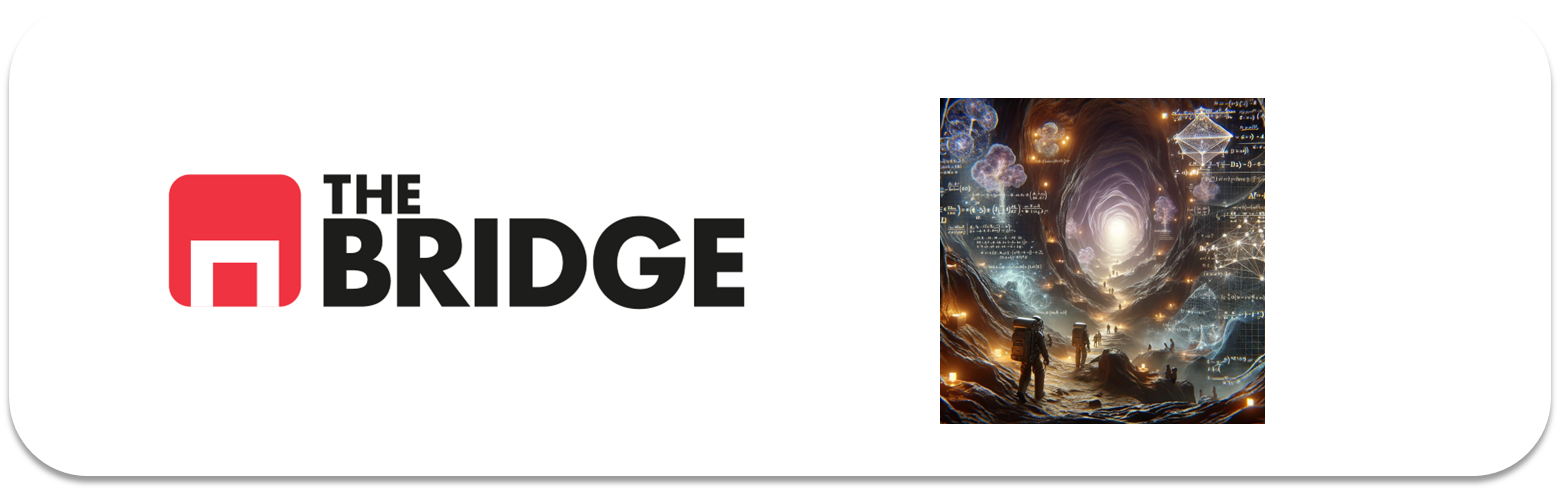

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias Bootcamp (Data Science - The Bridge Oct24')
# ==============================================================================
import bootcampviztools as bvt
import toolbox_ML as tml

# Preprocesado y modelado
# ==============================================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Semilla 42 para garantizar que los datos se mantengan
# ==============================================================================
np.random.seed(42)
tf.random.set_seed(42)  # Establecer semilla de aleatoriedad para TensorFlow

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Misc
# ==============================================================================
import time

## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

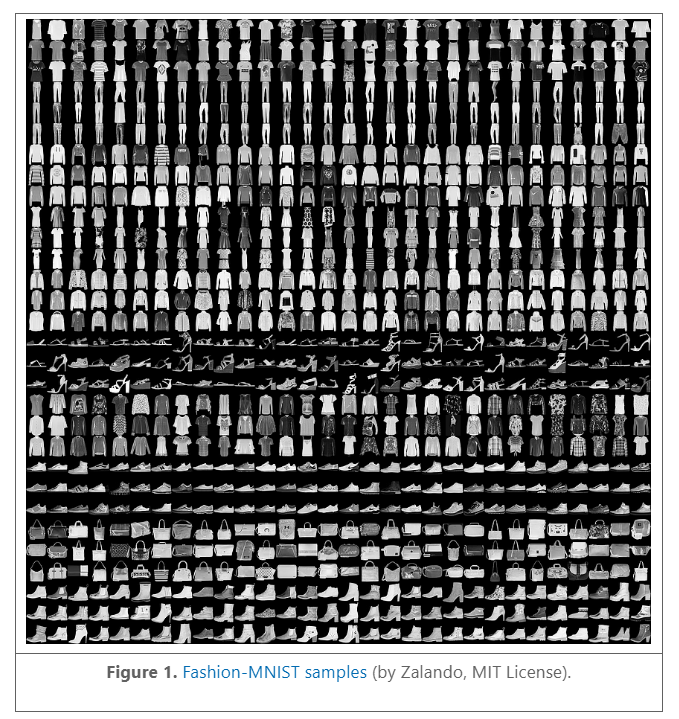

In [2]:
# # Evaluamos el modelo con el conjunto de test
# results = model.evaluate(X_test, y_test)

# # Creamos un DataFrame con los resultados y asignamos nombres de columnas dinámicamente
# results_df = pd.DataFrame([results], columns=['Loss', 'MAE', "MSE"])

# # Mostrar el DataFrame con los resultados
# results_df

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada. 

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde. 

Ejemplo del grafico de predicción más nivel de confianza:

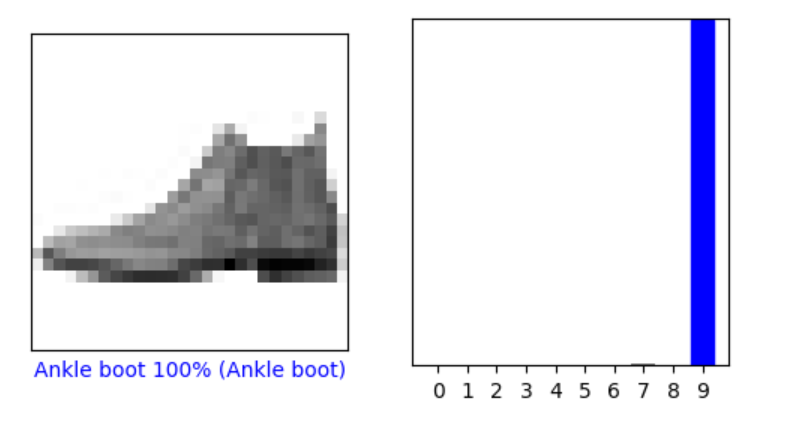

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado. 

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

```python

# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

```

____________________
### 0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada. 
____________________

In [3]:
# Cargar el dataset de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Dividir el dataset en entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

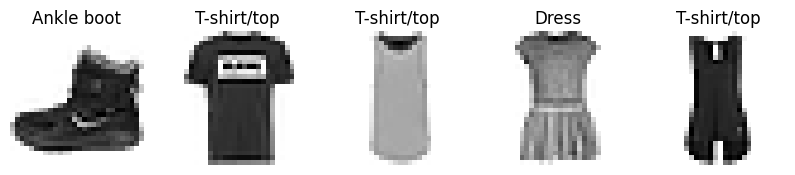

In [4]:
# Mapeo de las clases de ropa
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Función para visualizar imágenes y sus etiquetas
def show_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Visualizar 5 imágenes del conjunto de entrenamiento
show_images(train_images, train_labels, class_names)

________________________
### 1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.
________________________

In [5]:
# Preprocesar las imágenes: normalización a valores entre 0 y 1 (las imágenes están en escala de grises y sus valores de píxeles van de 0 a 255)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Construcción del modelo MLP
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),                         # Aplanar la imagen 28x28 en un vector de 784 dimensiones
    layers.Dense(128, activation='relu'),     # Capa oculta densa 1 con 128 neuronas y activación ReLU
    layers.Dense(64, activation='relu'),      # Capa oculta densa 2 con 64 neuronas y activación ReLU
    layers.Dense(10, activation='softmax')])  # Capa de salida con 10 neuronas (una por clase) y activación softmax (Porque es un problema de clasificación multiclase)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

_____________________________
### 2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjunto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.
_____________________________

In [6]:
history = model.fit(train_images, train_labels, 
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7622 - loss: 0.6699 - val_accuracy: 0.8492 - val_loss: 0.4137
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.3857 - val_accuracy: 0.8648 - val_loss: 0.3719
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3445 - val_accuracy: 0.8717 - val_loss: 0.3565
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8821 - loss: 0.3174 - val_accuracy: 0.8724 - val_loss: 0.3511
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8901 - loss: 0.2959 - val_accuracy: 0.8752 - val_loss: 0.3504
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8969 - loss: 0.2771 - val_accuracy: 0.8798 - val_loss: 0.3584
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9019 - loss: 0.2620 - val_accuracy: 0.8813 - val_loss: 0.3581
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9067 - loss: 0.2508 - 

In [7]:
df_train_history = pd.DataFrame(history.history)
df_train_history['epoch'] = history.epoch
df_train_history

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.815542,0.514242,0.849167,0.413675,0
1,0.861833,0.377518,0.864833,0.371860,1
2,0.874729,0.339103,0.871667,0.356542,2
3,0.882646,0.313354,0.872417,0.351090,3
4,0.890938,0.292441,0.875167,0.350351,4
5,0.897667,0.275117,0.879750,0.358374,5
6,0.901917,0.261621,0.881250,0.358062,6
7,0.906542,0.249556,0.880083,0.360857,7
8,0.910979,0.238611,0.879417,0.372551,8
9,0.913542,0.228782,0.882167,0.366272,9


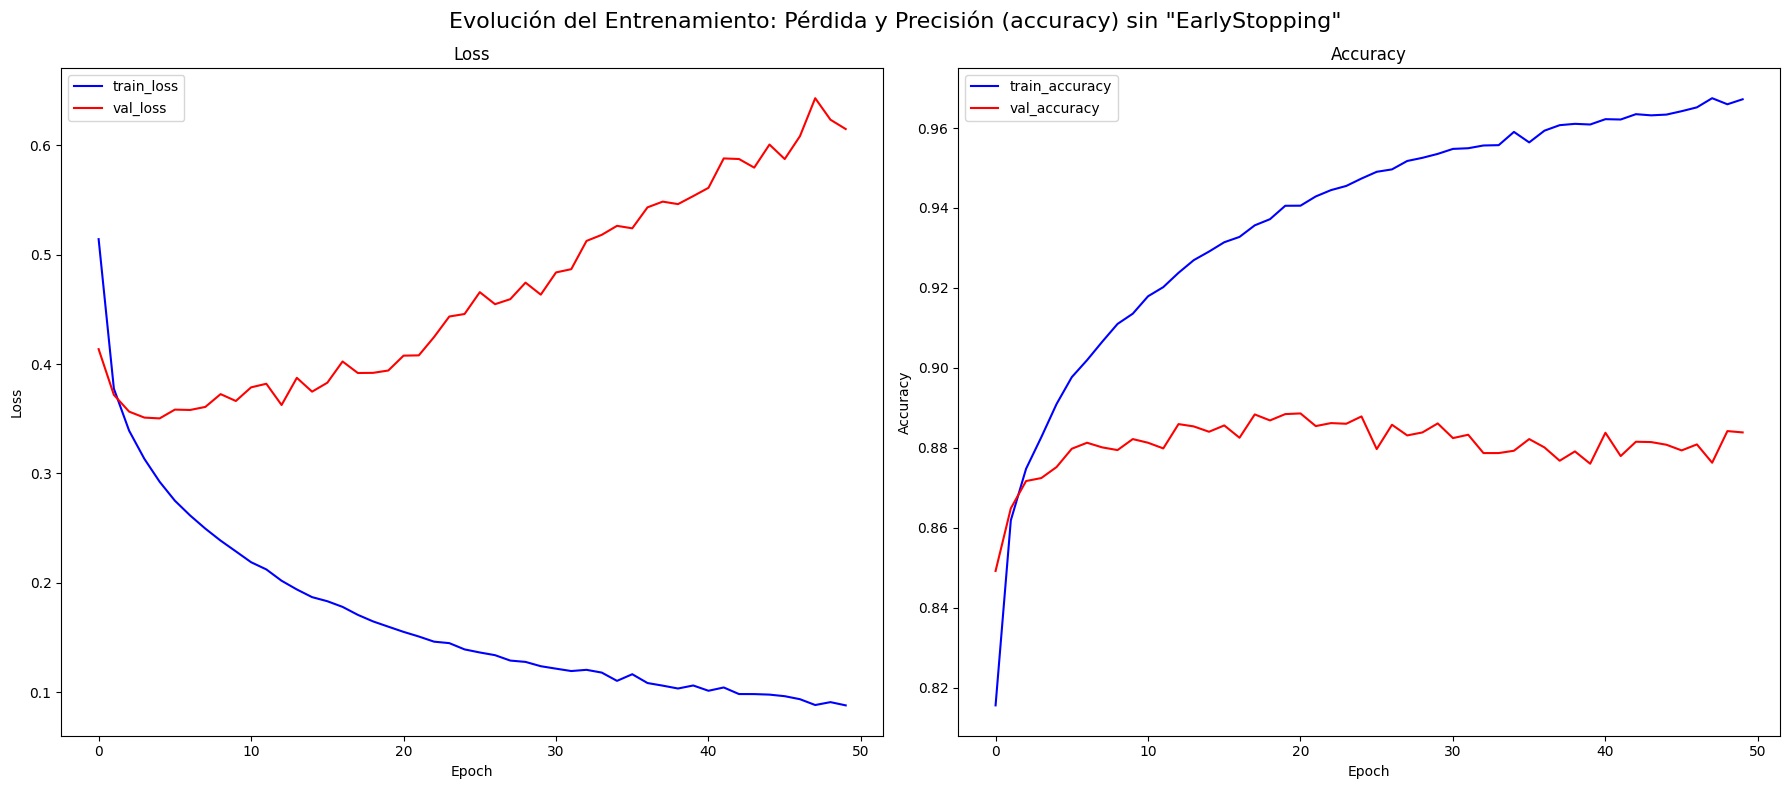

In [8]:
# Crear una figura con varias subgráficas
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Graficar 'loss' y 'val_loss'
ax[0].plot(df_train_history['loss'], label='train_loss', color='blue')
ax[0].plot(df_train_history['val_loss'], label='val_loss', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].margins(y=0.05)  # Ajuste automático con margen del 5%

# Graficar 'accuracy' y 'val_accuracy'
ax[1].plot(df_train_history['accuracy'], label='train_accuracy', color='blue')
ax[1].plot(df_train_history['val_accuracy'], label='val_accuracy', color='red')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].margins(y=0.05)  # Ajuste automático con margen del 5%

# Añadir título general al gráfico
plt.suptitle('Evolución del Entrenamiento: Pérdida y Precisión (accuracy) sin "EarlyStopping"', fontsize=16)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


In [9]:
# Construcción del modelo MLP
model2 = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),                         # Aplanar la imagen 28x28 en un vector de 784 dimensiones
    layers.Dense(128, activation='relu'),     # Capa oculta densa 1 con 128 neuronas y activación ReLU
    layers.Dense(64, activation='relu'),      # Capa oculta densa 2 con 64 neuronas y activación ReLU
    layers.Dense(10, activation='softmax')])  # Capa de salida con 10 neuronas (una por clase) y activación softmax (Porque es un problema de clasificación multiclase)

# Compilar el modelo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

# Entrenar el modelo, usando un 20% del conjunto de entrenamiento para validación
history_es = model2.fit(train_images, train_labels, 
                        epochs=50, 
                        validation_split=0.2,
                        batch_size=32,
                        callbacks=[early_stopping])


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7629 - loss: 0.6673 - val_accuracy: 0.8431 - val_loss: 0.4314
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3898 - val_accuracy: 0.8618 - val_loss: 0.3762
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3442 - val_accuracy: 0.8687 - val_loss: 0.3575
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8830 - loss: 0.3157 - val_accuracy: 0.8746 - val_loss: 0.3447
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8905 - loss: 0.2957 - val_accuracy: 0.8759 - val_loss: 0.3437
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8948 - loss: 0.2799 - val_accuracy: 0.8773 - val_loss: 0.3376
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8984 - loss: 0.2666 - val_accuracy: 0.8808 - val_loss: 0.3383
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9063 - loss: 0.2511 - 

In [11]:
df_train_history_es = pd.DataFrame(history_es.history)
df_train_history_es['epoch'] = history_es.epoch
df_train_history_es

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.816417,0.513549,0.843083,0.431378,0
1,0.861542,0.379660,0.861750,0.376197,1
2,0.875271,0.337872,0.868667,0.357505,2
3,0.884938,0.311759,0.874583,0.344667,3
4,0.890750,0.292556,0.875917,0.343652,4
5,0.895125,0.277041,0.877333,0.337577,5
6,0.900854,0.262301,0.880750,0.338262,6
7,0.906563,0.248381,0.879833,0.347142,7
8,0.908729,0.240277,0.882667,0.340620,8
9,0.912938,0.229162,0.880750,0.353114,9


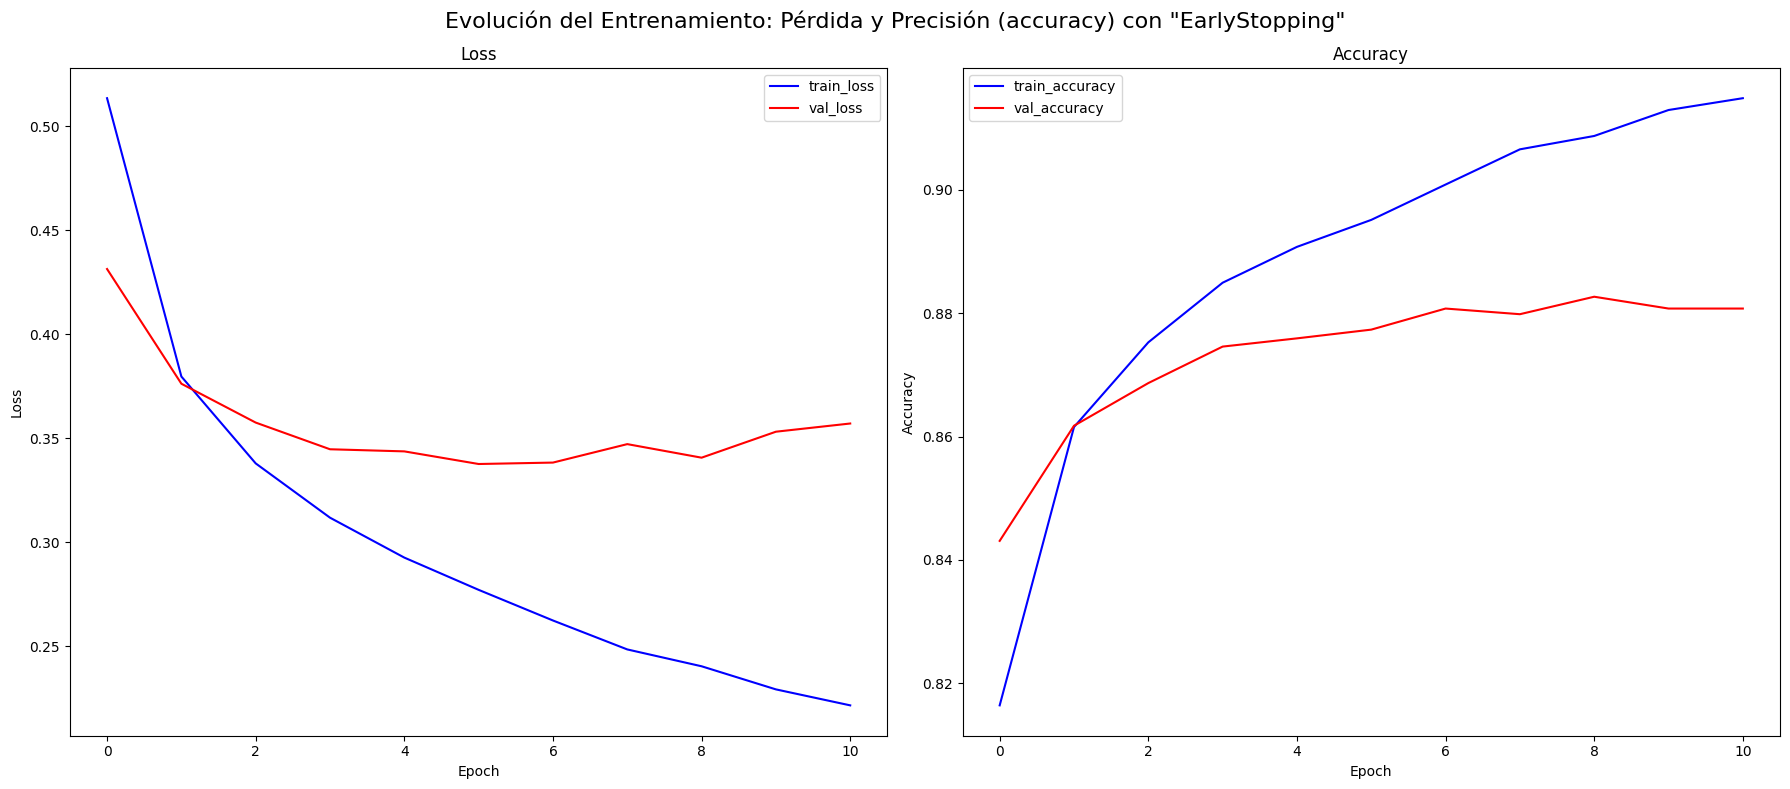

In [12]:
# Crear una figura con varias subgráficas
fig, ax = plt.subplots(1, 2, figsize=(18,8))

# Graficar 'loss' y 'val_loss'
ax[0].plot(df_train_history_es['loss'], label='train_loss', color='blue')
ax[0].plot(df_train_history_es['val_loss'], label='val_loss', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].margins(y=0.05)  # Ajuste automático con margen del 5%

# Graficar 'accuracy' y 'val_accuracy'
ax[1].plot(df_train_history_es['accuracy'], label='train_accuracy', color='blue')
ax[1].plot(df_train_history_es['val_accuracy'], label='val_accuracy', color='red')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].margins(y=0.05)  # Ajuste automático con margen del 5%

# Añadir título general al gráfico
plt.suptitle('Evolución del Entrenamiento: Pérdida y Precisión (accuracy) con "EarlyStopping"', fontsize=16)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

#### Se puede observar que en el modelo sin el EarlyStopping tiene a sobreajustarse luego de la época 5, la accuracy no mejora a partir de ese momento, lo que indica esto último. Caso contrario que en el modelo con EarlyStopping, que al detectar que no mejora a partir de esa época, con un patience = 5, se queda hasta la época 10. Sin un fino ajuste de los hiperparámetros del modelo, este suele a sobreajustarse.

______________________
### 3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde. 
______________________

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.75      0.81      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.78      0.78      0.78      1000
       Dress       0.83      0.93      0.87      1000
        Coat       0.83      0.75      0.79      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.65      0.73      0.69      1000
     Sneaker       0.88      0.98      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.97      0.91      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



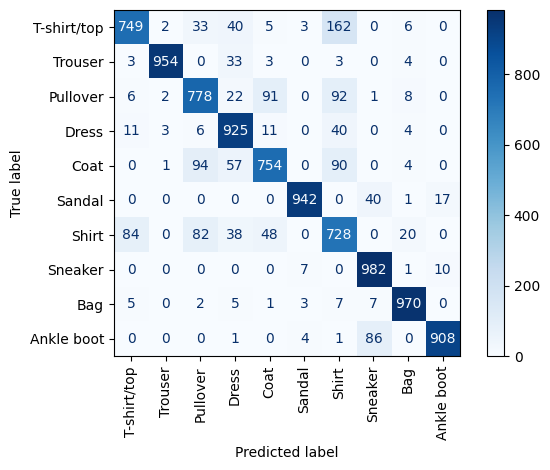

In [13]:
# Evaluar el modelo contra el conjunto de test
y_pred = model2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Reporte de clasificación
print(classification_report(test_labels, y_pred_classes, target_names=class_names))

# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred_classes, display_labels=class_names, cmap='Blues', xticks_rotation=90)
plt.tight_layout()
plt.show()

#### Tanto en la matriz de confusión como el classification report del modelo, las clases que menos presición tienen son las clases que tienen cierta similitud visual entre ellas en terminos de forma, como  lo son T-shirt/Shirt, Pullover/Coat o Shirt y Sneaker/Ankle boot

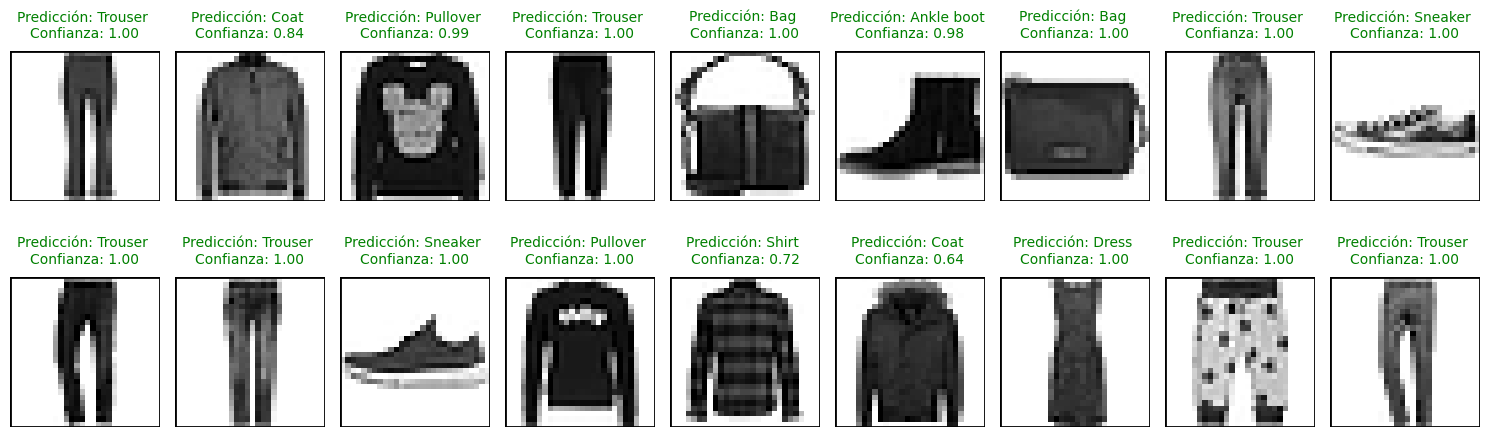

In [14]:
# Seleccionar índices donde las predicciones son correctas
correct_idx = np.where(y_pred_classes == test_labels)[0]  # Compara predicciones con las etiquetas reales

# Seleccionar 18 índices aleatorios de predicciones correctas
random_idx = np.random.choice(correct_idx, 18, replace=False)

# Mostrar las imágenes aleatorias con su predicción y confianza
fig, axes = plt.subplots(2, 9, figsize=(15, 5))
for i in range(18):
    ax = axes[i // 9, i % 9]  # Determinar la posición en la grilla de 2x9
    ax.imshow(test_images[random_idx[i]], cmap=plt.cm.binary)
    
    # Añadir título con predicción y confianza
    ax.set_title(f"Predicción: {class_names[y_pred_classes[random_idx[i]]]} \nConfianza: {np.max(y_pred[random_idx[i]]):.2f}",
                 fontsize=10, pad=10, loc='center',  # Ajustar tamaño de fuente y separación
                 color='green')
    
    # Dibujar un rectángulo alrededor de la imagen
    rect = plt.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', transform=ax.transAxes)
    ax.add_patch(rect)

    ax.axis('off')  # Quitar los ejes

plt.tight_layout()
plt.show()

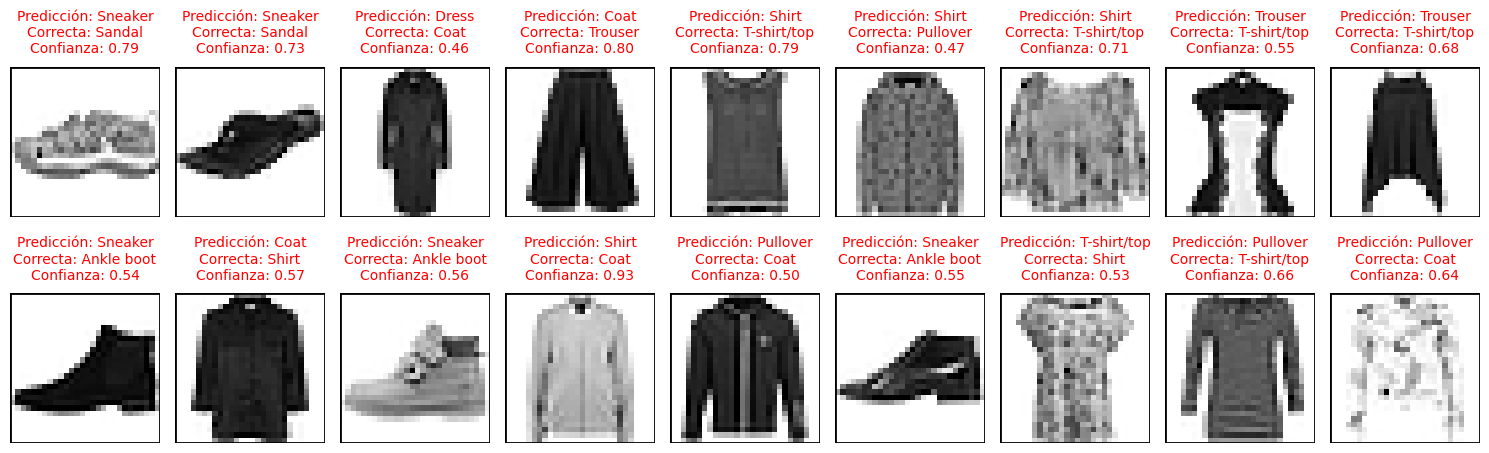

In [15]:
# Identificar las predicciones incorrectas
# Comparamos las clases predichas (y_pred_classes) con las etiquetas reales (test_labels)
# y obtenemos los índices donde la predicción es incorrecta.
incorrect_idx = np.where(y_pred_classes != test_labels)[0]

# Seleccionar 18 índices aleatorios de predicciones incorrectas
# Elegimos aleatoriamente 18 índices de los que contienen predicciones incorrectas.
random_incorrect_idx = np.random.choice(incorrect_idx, 18, replace=False)

# Obtener las imágenes, etiquetas reales, predicciones y niveles de confianza correspondientes
# Usamos los índices seleccionados para obtener las imágenes, etiquetas y predicciones incorrectas
incorrect_images = test_images[random_incorrect_idx]  # Imágenes correspondientes a las predicciones incorrectas
incorrect_labels = test_labels[random_incorrect_idx]  # Etiquetas reales de esas imágenes
incorrect_pred = y_pred_classes[random_incorrect_idx]  # Predicciones incorrectas
incorrect_confidence = np.max(y_pred[random_incorrect_idx], axis=1)  # Confianza de las predicciones incorrectas

# Mostrar las imágenes incorrectas con su predicción, confianza y la clase correcta
# Creamos una grilla 2x9 para mostrar las 18 imágenes en una forma organizada
fig, axes = plt.subplots(2, 9, figsize=(15, 5))

# Iteramos sobre las 18 imágenes incorrectas y las mostramos en la grilla
for i in range(18):
    # Determinamos la posición en la grilla de 2x9 para colocar la imagen correctamente
    ax = axes[i // 9, i % 9]  # i // 9 nos da el número de fila y i % 9 nos da la columna en la grilla
    ax.imshow(incorrect_images[i], cmap=plt.cm.binary)  # Mostramos la imagen en escala de grises
    
    # Añadir título con la predicción incorrecta, la clase correcta y el nivel de confianza
    ax.set_title(f"Predicción: {class_names[incorrect_pred[i]]}\n"
                 f"Correcta: {class_names[incorrect_labels[i]]}\n"
                 f"Confianza: {incorrect_confidence[i]:.2f}",
                 fontsize=10, pad=10, loc='center', 
                 color='red')
    
    # Dibujar un rectángulo alrededor de la imagen
    rect = plt.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', transform=ax.transAxes)
    ax.add_patch(rect)

    ax.axis('off')  # Quitar los ejes para mejorar la visualización


plt.tight_layout()
plt.show()
